
    
# Le traitement Photo avec python


!!! info Info
    
Le sous-module `Image` du module `PIL` de Python va nous permettre aussi de faire du traitement d'images : passer en noir et blanc, négatif couleurs ....
Pour simplifier les fonctions necessaires ont été enregistrées dans un fichier. Pour les utiliser, la première étape est d'importer cette bibliothéque.
!!!

!!! question Exercice
Exécuter la cellule ci-dessous
!!!     

In [ ]:
from PIL import Image

In [ ]:
from _fonctions_images import*

!!! info Info
La fonction `nature` permet de déterminer quelques propriétés d'un fichier image en particulier la façon dont est codé un pixel de l'image.
!!!

!!! question Exercice

Les deux fichiers `kingfisher.jpg` et `kingfisherNB.jpg` sont donnés en annexe.    
Exécuter les deux cellules ci-dessous et observez les différences de mode

*Le fichier image `kingfisher.jpg` est une image de David Mark de Pixabay. Le fichier `kingfisherNB.jpg` a été obtenu à partir de cette image en utilisant le logiciel libre de traitement d'images GIMP.*
!!!

Format de l'image :  JPEG
Taille de l'image :  (640, 426)
Mode de l'image :  RGB
En largeur, l'image contient : 640  pixels
En hauteur, l'image contient : 426  pixels
le pixel (0, 0) est codé par : (249, 190, 130)


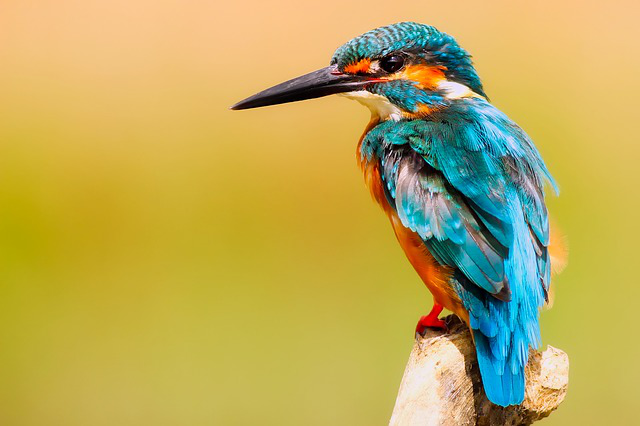

In [4]:
nature("kingfisher.jpg")

!!! note Remarque
On constate qu'un pixel est codé par un triplet RGB : c'est une image en couleurs
!!!

In [ ]:
nature("kingfisherNB.jpg")

!!! note Remarque
On constate qu'un pixel est codé par un entier :  c'est une image en niveaux de gris
!!!

## Image en nuances de gris


Dans cette partie, on se propose de transformer une image en **nuances de gris** en appliquant une fonction transformant la valeur de chaque pixel.

!!! info Info
On va utiliser une fonction `transformation` qui prend en arguments le nom du fichier image  et la fonction de transformation et qui affiche l'image obtenue à partir du fichier image en lui faisant subir la fonction de transformation.
!!!

!!! warning Attention
La fonction `transformation` ne pourra être utilisée que pour des images en mode L
!!!

### Le seuillage
!!! info Info
Le seuillage d'une image consiste à transformer une image en niveau de gris en une image dont les valeurs de pixels ne peuvent avoir que la valeur 0 ou 255. On parle alors d'une image binaire ou image en noir et blanc. Cette technique permet d'affecter un niveau uniforme aux pixels pertinents et d'éliminer les autres. Cette technique est parfois utilisée pour faire de la reconnaissance de motif.

Le seuillage consiste à affecter le niveau 255 aux pixels dont la valeur est supérieure à un seuil S et  le niveau 0 aux autres. 
!!!

!!! question Exercice
Compléter la fonction `seuil` qui prend en argument un entier `val` et qui renvoie 0 si `val` est inférieur à `127` et 255 sinon. Exécuter ensuite la cellule pour pouvoir utiliser votre fonction. Faites des tests.
!!!

In [ ]:
def seuil(val):
    """val est un entier compris entre 0 et 255
    cette fonction renvoie 0 ou 255 selon que val est inférieur ou supérieur à 127"""
    if ... :
        n = ...
    else:
        n = ...
    return n

In [ ]:
# exemple avec un pixel d'intensité 158
print(seuil(158))

In [ ]:
# autre exemple de votre choix


!!! question Exercice 
Ecrire une fonction `seuil2(val)` en utilisant une valeur de seuillage de votre choix et la tester.   
!!!

!!! question Exercice 
Exécuter la cellule pour transformer l'image en niveaux de gris du martin-pêcheur à l'aide des fonctions `transformation` et  `seuil` 
!!!

In [ ]:
transformation("kingfisherNB.jpg", seuil)

!!! question Exercice 
Ecrire et exécuter les instructions  pour transformer l'image en niveaux de gris du martin-pêcheur à l'aide des fonctions `transformation` et  `seuil2` 
!!!

!!! note Remarque
Pour pouvoir enregistrer l'image obtenue, il suffit de faire un clic droit sur l'image.
!!!

### Le négatif

 
!!! info Info
Le négatif d'une image en niveau de gris, sera une image en niveau de gris. Si un pixel de l'image originale vaut `val` alors l'intensité du pixel correspondant dans le négatif sera `255 - val`. 
!!!

!!! question Exercice 
Compléter le code de la fonction `negatif_gris`.
!!!

In [ ]:
def negatif_gris(val):
    """val est un entier compris entre 0 et 255
    cette fonction renvoie 255-val (le complément à 255)"""
    return ...

In [ ]:
# exemple avec un pixel d'intensité 158
print(negatif_gris(158))

!!! question Exercice
Ecrire et exécuter les instructions  pour transformer l'image en niveaux de gris du martin-pêcheur à l'aide des fonctions `transformation` et  `negatif_gris`
!!!

## Image en couleurs

Dans cette partie, on se propose de transformer une image en mode RGB en appliquant une fonction transformant la valeur de chaque pixel. On rappelle que dans ce cas, un pixel est donné par un triplet (r, g, b).

### Mettre en niveaux de gris

!!! info Info
Chaque pixel d'une image en couleurs est représenté par un triplet de nombres compris entre 0 et 255 pour les canaux respectifs de Rouge, de Vert et de Bleu (RVB ou RGB en anglais). Pour la transformer en une image en niveaux de gris, il suffit de remplacer le triplet (r, g, b) par un entier compris entre 0 et 255 correspondant à une nuance de gris.
!!!

Il existe plusieurs façons de définir cet entier en fonction du triplet (r, g, b) ; nous allons en voir deux.


!!! info La recommandation 709 (le beau gris)
La <a href ="https://fr.wikipedia.org/wiki/Rec._709">"recommandation 709"</a> propose une moyenne pondérée à partir de (r, g, b) en prenant pour valeur commune  :

`gris = 0.2126r+0.7152g+0.0722b` 
!!!

!!! question Exercice
Compléter la fonction `en_gris` qui prend en paramètre un triplet `t` et qui renvoie la valeur du gris selon la recommandation 709.  
!!!

!!! info Info 
Le calcul à faire ne donne pas, en génaral, un résultat entier : il faut donc le convertir en entier avec la fonction `int` de python. 
!!!

In [ ]:
def en_gris(t):
    """t est un triplet d'entiers compris entre 0 et 255
    cette fonction renvoie la valeur du gris de la recommandation 709"""
    # l'instruction ci-dessous permet de stocker le premier élément du triplet dans la variable R,
    # le deuxième dans G et le dernier dans B.  
    R, G, B = t
    # on applique la formule et comme on veut un résultat entier on utilsie la fonction int qui convertit le résulat en entier (arrondi)
    gris = int(...) 
    return gris

In [ ]:
# pour tester
print(en_gris((255, 64, 128)))

!!! info Info
On va utiliser une fonction `transformation_gris` qui prend en arguments le nom du fichier image  et la fonction de transformation et qui affiche l'image en niveaux de gris (mode L) obtenue à partir du fichier image en lui faisant subir la fonction de transformation. 
!!!

!!! warning Attention
La fonction `transformation_gris` ne pourra être utilisée que pour des images en mode RGB
!!! 

!!! question Exercice
Ecrire et exécuter les instructions  pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_gris` et  `en_gris`
!!!

!!! info La saturation 

 Chaque pixel d'une image en couleurs est représenté par un triplet RGB ou un triplet TSL pour Teinte, Saturation, Luminosité.   
 Le site  http://www.easyrgb.com/en/math.php#text20 fournit les conversions RGB/TSL.   
 On peut obtenir du gris en annulant la saturation autrement dit en mettant la composante S à 0.    

La conversion RVB -> TSL est complexe, mais dans le cas où S = 0, la conversion TSL -> RGB se simplifie en `R = G = B = L * 255`
 
 D'autre part, la composante L d'une couleur RVB est obtenu par la formule :  $L=\dfrac{\min(R,G,B)+\max(R,G,B)}{2\times 255}.$

 **Finalement**, annuler la saturation revient à calculer la valeur du gris correspondant avec la formule suivante :
 
 $gris =\dfrac{\min(R, G, B)+\max(R, G, B)}2$
 
!!!

!!! info Info  
La fonction $\min(R, G, B)$ renvoie la plus petite des trois valeurs et la fonction $\max(R, G, B)$ renvoie la plus grande des trois valeurs.
!!!

!!! question Exercice
Compléter la fonction `gris_sat` qui prend en paramètre un triplet `t` et qui renvoie la valeur du gris obtenue avec la saturation.    
Le calcul à faire ne donne pas, en général, un résultat entier : il faut donc convertir en entier.
!!!

In [ ]:
def gris_sat(t):
    """t est un triplet d'entiers compris entre 0 et 255
    cette fonction renvoie la valeur du gris obtenue avec la saturation"""
    R, G, B = t
    gris = int(...)
    return gris

In [ ]:
# pour tester
print(gris_sat((255, 64, 128)))

!!! question Exercice
Ecrire et exécuter les instructions  pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_gris` et  `gris_sat`
!!!

### Faire un négatif

Le négatif d'une image en couleurs sera une image en couleurs.   
Pour chaque pixel donnée par le triplet (R, G, B), le pixel du négatif sera donné par le triplet (255-R, 255-G, 255-B).

!!! question Exercice
Compléter le code de la fonction `negatif_couleur` qui prend en paramètre un triplet `t` et qui renvoie le triplet correspond au négatif.
!!!

In [ ]:
def negatif_couleur(t) :    
    """t est un triplet d'entiers compris entre 0 et 255
    cette fonction renvoie le triplet du négatif"""
    R, G, B = t
    return (..., ..., ...)
    

In [ ]:
# pour tester
negatif_couleur((0, 180, 255))

!!! info Info
On va utiliser une fonction `transformation_couleur` qui prend en arguments le nom du fichier image  et la fonction de transformation et qui affiche l'image en couleur (mode RGB) obtenue à partir du fichier image en lui faisant subir la fonction de transformation. 
!!!

!!! warning Attention
La fonction `transformation_couleur` ne pourra être utilisée que pour des images en mode RGB
!!! 
 
!!! question Exercice
Ecrire et exécuter les instructions  pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et  `negatif_couleur`
!!!

## Obtenir la composante R ou G ou B d'une image couleur

### Composante rouge

Obtenir la composante rouge d'une image couleur consiste à remplacer le triplet (R, G, B) de chaque pixel par le triplet (R, 0, 0) autrement dit on met l'intensité du vert et du bleu à 0.

!!! question Exercice
Compléter le code de la fonction `rouge` pour obtenir le triplet `(R, 0, 0)`. 
!!!

In [ ]:
# Cette fonction ne pourra être utilisée que pour des images en mode RGB et donnera une image en mode RGB 

def rouge(t):       
    """t est un triplet d'entiers compris entre 0 et 255
    cette fonction renvoie le triplet (R, 0, 0)"""
    R, G, B = t
    return (..., ..., ...)
    

In [ ]:
# pour tester
rouge((154, 180, 25))

!!! question Exercice
Ecrire et exécuter les instructions pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et `rouge`
!!!

!!! question Exercice
Ecrire les fonctions `verte` et `bleu` pour obtenir respectivement les composantes verte et bleue.
!!!

In [ ]:
def verte(t):
    # à compléter

# pour tester
verte((154, 180, 25))

In [ ]:
def bleue(t):
# à compléter


# pour tester
bleue((154, 180, 25))   

!!! question Exercice
Ecrire et exécuter les instructions pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et `verte`
!!!

!!! question Exercice
Ecrire et exécuter les instructions pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et `bleue`
!!!

### Composante rouge et inverse 
On se propose ici, pour chaque pixel de l'image de garder l'intensité du rouge et d'"inverser" comme pour un négatif l'intensité de vert et de bleu.
 
!!! question Exercice
Compléter le code de la fonction `rouge_inverse` pour afficher l'image  permettent de mettre en oeuvre l'opération décrite ci-dessus.   
!!!


In [ ]:
 
def rouge_inverse(t):
    """t est un triplet d'entiers compris entre 0 et 255
    cette fonction renvoie le triplet (R, 0, 0)"""
    R, G, B = t
    return (..., ..., ...)
    

In [ ]:
# pour tester
rouge_inverse((154, 180, 25))

!!! question Exercice
Ecrire et exécuter les instructions pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et `rouge_inverse`
!!!

!!! question Exercice
Ecrire les fonctions `verte_inverse` et `bleu_inverse` pour obtenir un triplet  de la même façon que pour le rouge.
!!!

In [ ]:
def verte_inverse(t) :
    # à compléter


# On teste 
verte_inverse((154, 180, 25))

In [ ]:
def bleue_inverse(t) :
    # à compléter


# On teste 
bleue_inverse((154, 180, 25))

!!! question Exercice
Ecrire et exécuter les instructions pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et `verte_inverse`
!!!

!!! question Exercice
Ecrire et exécuter les instructions pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et `bleue_inverse`
!!!

!!! question Exercice
Inventer une transformation et écrire la fonction qui va avec.
!!!

Nathalie Maïer 

*Les activités partagées sur <a href="https://capytale2.ac-paris.fr/web/accueil">**Capytale**</a> sont sous licence <a href="https://creativecommons.org/licenses/by-sa/3.0/fr/">Creative Commons</a>.*